# Variable list
**Quantative Explanatory Variables:**
* CreditScore
* Age
* Tenure
* Balance
* NumOfProducts
* EstimatedSalary

**Caterorical Explanatory Variables:**
* Occupation
* Location
* Gender
* HasCrCard
* IsActiveMember

**Response Variables:**
* Exited







# STEP 1: Importing libraries

In [1]:
import pandas
import numpy
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing

from sklearn.cluster import KMeans
from pandas import DataFrame

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP 2: Import data set and make data managment decisions

In [2]:
data = pandas.read_csv("/content/bank data.csv")
data = data.dropna()
data

,CustomerId,CreditScore,occupation,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15798485,565,self_employed,Delhi,Male,31,1,0.00,1,0,1,20443.08,0
1,15588959,569,self_employed,Delhi,Male,34,4,0.00,1,0,1,4045.90,0
2,15624896,669,salaried,Delhi,Female,20,7,0.00,2,1,0,128838.67,0
3,15639629,694,self_employed,Delhi,Male,39,4,173255.48,1,1,1,81293.10,0
4,15638852,504,self_employed,Kolkata,Male,28,10,109291.36,1,1,1,187593.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,15629720,604,self_employed,Delhi,Female,44,8,102512.85,1,1,0,145118.56,1
995,15730373,531,self_employed,Delhi,Female,34,10,118306.79,1,1,0,26493.05,0
996,15716191,575,self_employed,Mumbai,Male,49,2,136822.70,1,1,0,2487.74,0
998,15581432,675,self_employed,Kolkata,Male,23,8,0.00,2,0,0,162342.21,0


In [3]:
#make a copy of data
sub1 = data.copy()

#convert fields to numeric
sub1['CreditScore'] = pandas.to_numeric(sub1['CreditScore'], errors='ignore')
sub1['Age'] = pandas.to_numeric(sub1['Age'], errors='ignore')
sub1['Tenure'] = pandas.to_numeric(sub1['Tenure'], errors='ignore')
sub1['Balance'] = pandas.to_numeric(sub1['Balance'], errors='ignore')
sub1['NumOfProducts'] = pandas.to_numeric(sub1['NumOfProducts'], errors='ignore')
sub1['HasCrCard'] = pandas.to_numeric(sub1['HasCrCard'], errors='ignore')
sub1['IsActiveMember'] = pandas.to_numeric(sub1['IsActiveMember'], errors='ignore')
sub1['EstimatedSalary'] = pandas.to_numeric(sub1['EstimatedSalary'], errors='ignore')
sub1['Exited'] = pandas.to_numeric(sub1['Exited'], errors='ignore')

RECODING VARIABLES

1. Occupation :
                        self_employed as 0
                        salaried as 1
                        retired as 2
                        student as 3

2. Location :
                        Delhi as 0
                        Kolkata as 1
                        Mumbai as 2

2. Gender :
                        Male as 0
                        Female as 1



In [4]:
recode1={'self_employed':'0', 'salaried':'1', 'retired':'2', 'student':'3'}
sub1['occupation'] = sub1['occupation'].map(recode1)
sub1['occupation'] = pandas.to_numeric(sub1['occupation'], errors='ignore')
print('Recoded Occupation field')
sub1['occupation']

Recoded Occupation field


0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
994    0.0
995    0.0
996    0.0
998    0.0
999    0.0
Name: occupation, Length: 996, dtype: float64

In [5]:
recode1={'Delhi':'0', 'Kolkata':'1', 'Mumbai':'2'}
sub1['Location'] = sub1['Location'].map(recode1)
sub1['Location'] = pandas.to_numeric(sub1['Location'], errors='ignore')
print('Recoded Location field')
sub1['Location']

Recoded Location field


0      0
1      0
2      0
3      0
4      1
      ..
994    0
995    0
996    2
998    1
999    0
Name: Location, Length: 996, dtype: int64

In [6]:
recode1={'Male':'0', 'Female':'1'}
sub1['Gender'] = sub1['Gender'].map(recode1)
sub1['Gender'] = pandas.to_numeric(sub1['Gender'], errors='ignore')
print('Recoded Gender field')
sub1['Gender']

Recoded Gender field


0      0
1      0
2      1
3      0
4      0
      ..
994    1
995    1
996    0
998    0
999    0
Name: Gender, Length: 996, dtype: int64

In [7]:
#final data set
sub1

,CustomerId,CreditScore,occupation,Location,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15798485,565,0.0,0,0,31,1,0.00,1,0,1,20443.08,0
1,15588959,569,0.0,0,0,34,4,0.00,1,0,1,4045.90,0
2,15624896,669,1.0,0,1,20,7,0.00,2,1,0,128838.67,0
3,15639629,694,0.0,0,0,39,4,173255.48,1,1,1,81293.10,0
4,15638852,504,0.0,1,0,28,10,109291.36,1,1,1,187593.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,15629720,604,0.0,0,1,44,8,102512.85,1,1,0,145118.56,1
995,15730373,531,0.0,0,1,34,10,118306.79,1,1,0,26493.05,0
996,15716191,575,0.0,2,0,49,2,136822.70,1,1,0,2487.74,0
998,15581432,675,0.0,1,0,23,8,0.00,2,0,0,162342.21,0


# STEP 3: Bar Graphs

In [8]:
sub1['CreditScore'] = sub1['CreditScore'].astype('category')
sub1['occupation'] = sub1['occupation'].astype('category')
sub1['Location'] = sub1['Location'].astype('category')
sub1['Gender'] = sub1['Gender'].astype('category')
sub1['Age'] = sub1['Age'].astype('category')
sub1['Tenure'] = sub1['Tenure'].astype('category')
sub1['Balance'] = sub1['Balance'].astype('category')
sub1['NumOfProducts'] = sub1['NumOfProducts'].astype('category')
sub1['HasCrCard'] = sub1['HasCrCard'].astype('category')
sub1['IsActiveMember'] = sub1['IsActiveMember'].astype('category')
sub1['EstimatedSalary'] = sub1['EstimatedSalary'].astype('category')
sub1['Exited'] = sub1['Exited'].astype('category')

Text(0.5, 1.0, 'CreditScore vs Exited')

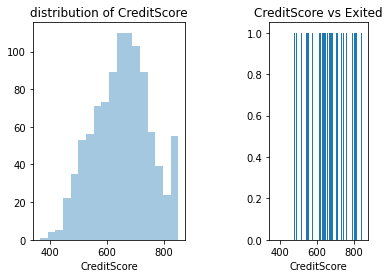

In [9]:
plt.subplot(121)
seaborn.distplot(sub1['CreditScore'].dropna(), kde=False)
plt.xlabel('CreditScore')
plt.title('distribution of CreditScore')
plt.subplot(133)
plt.bar(sub1['CreditScore'], sub1['Exited'])
plt.xlabel('CreditScore')
plt.title('CreditScore vs Exited')

Text(0.5, 1.0, 'occupation vs Exited')

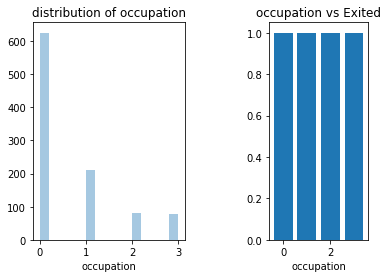

In [10]:
plt.subplot(121)
seaborn.distplot(sub1['occupation'].dropna(), kde=False)
plt.xlabel('occupation')
plt.title('distribution of occupation')
plt.subplot(133)
plt.bar(sub1['occupation'], sub1['Exited'])
plt.xlabel('occupation')
plt.title('occupation vs Exited')

Text(0.5, 1.0, 'Exited vs Location')

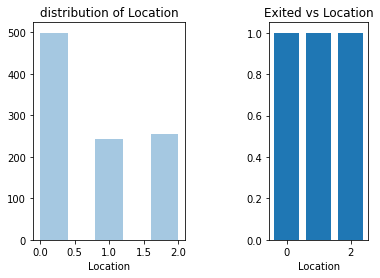

In [11]:
plt.subplot(121)
seaborn.distplot(sub1['Location'].dropna(), kde=False)
plt.xlabel('Location')
plt.title('distribution of Location')
plt.subplot(133)
plt.bar(sub1['Location'], sub1['Exited'])
plt.xlabel('Location')
plt.title('Exited vs Location')

Text(0.5, 1.0, 'Exited vs Gender')

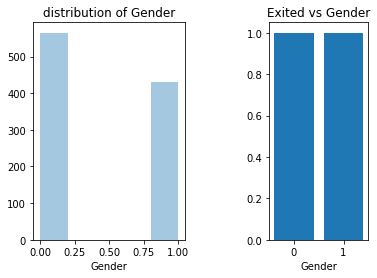

In [12]:
plt.subplot(121)
seaborn.distplot(sub1['Gender'].dropna(), kde=False)
plt.xlabel('Gender')
plt.title('distribution of Gender')
plt.subplot(133)
plt.bar(sub1['Gender'], sub1['Exited'])
plt.xlabel('Gender')
plt.title('Exited vs Gender')

Text(0.5, 1.0, 'Exited vs Age')

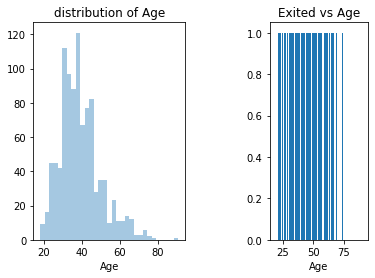

In [13]:
plt.subplot(121)
seaborn.distplot(sub1['Age'].dropna(), kde=False)
plt.xlabel('Age')
plt.title('distribution of Age')
plt.subplot(133)
plt.bar(sub1['Age'], sub1['Exited'])
plt.xlabel('Age')
plt.title('Exited vs Age')

Text(0.5, 1.0, 'Tenure vs Exited')

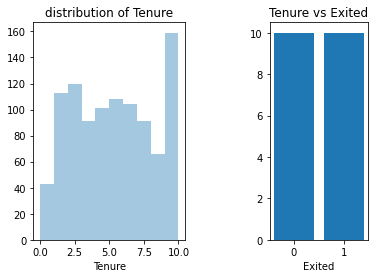

In [14]:
plt.subplot(121)
seaborn.distplot(sub1['Tenure'].dropna(), kde=False)
plt.xlabel('Tenure')
plt.title('distribution of Tenure')
plt.subplot(133)
plt.bar(sub1['Exited'], sub1['Tenure'])
plt.xlabel('Exited')
plt.title('Tenure vs Exited')

Text(0.5, 1.0, 'Balance vs Exited')

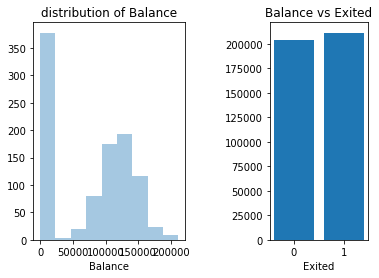

In [15]:
plt.subplot(121)
seaborn.distplot(sub1['Balance'].dropna(), kde=False)
plt.xlabel('Balance')
plt.title('distribution of Balance')
plt.subplot(133)
plt.bar(sub1['Exited'], sub1['Balance'])
plt.xlabel('Exited')
plt.title('Balance vs Exited')

Text(0.5, 1.0, 'NumOfProducts vs Exited')

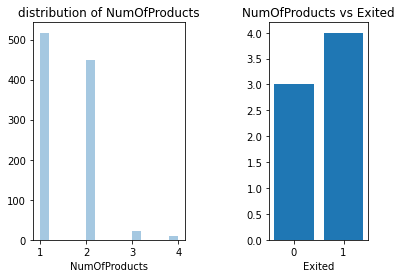

In [16]:
plt.subplot(121)
seaborn.distplot(sub1['NumOfProducts'].dropna(), kde=False)
plt.xlabel('NumOfProducts')
plt.title('distribution of NumOfProducts')
plt.subplot(133)
plt.bar(sub1['Exited'], sub1['NumOfProducts'])
plt.xlabel('Exited')
plt.title('NumOfProducts vs Exited')

Text(0.5, 1.0, 'Exited vs HasCrCard')

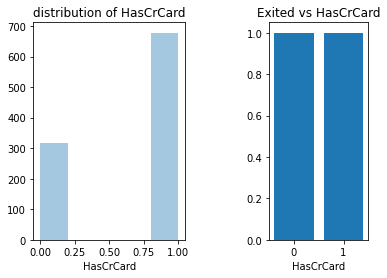

In [17]:
plt.subplot(121)
seaborn.distplot(sub1['HasCrCard'].dropna(), kde=False)
plt.xlabel('HasCrCard')
plt.title('distribution of HasCrCard')
plt.subplot(133)
plt.bar(sub1['HasCrCard'], sub1['Exited'])
plt.xlabel('HasCrCard')
plt.title('Exited vs HasCrCard')

Text(0.5, 1.0, 'Exited vs IsActiveMember')

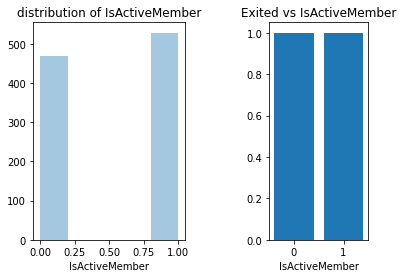

In [18]:
plt.subplot(121)
seaborn.distplot(sub1['IsActiveMember'].dropna(), kde=False)
plt.xlabel('IsActiveMember')
plt.title('distribution of IsActiveMember')
plt.subplot(133)
plt.bar(sub1['IsActiveMember'], sub1['Exited'])
plt.xlabel('IsActiveMember')
plt.title('Exited vs IsActiveMember')

Text(0.5, 1.0, 'EstimatedSalary vs Exited')

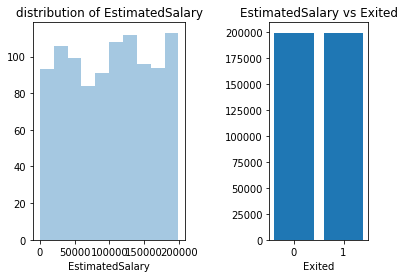

In [19]:
plt.subplot(121)
seaborn.distplot(sub1['EstimatedSalary'].dropna(), kde=False)
plt.xlabel('EstimatedSalary')
plt.title('distribution of EstimatedSalary')
plt.subplot(133)
plt.bar(sub1['Exited'], sub1['EstimatedSalary'])
plt.xlabel('Exited')
plt.title('EstimatedSalary vs Exited')

# STEP 4: Chi Square Test of Independence






1) NULL HYPOTHESIS - There is no relation between HasCrCard and Exited



In [20]:
# contingency table of observed counts
print('\ncontingency table of observed counts')
ct1=pandas.crosstab(sub1['HasCrCard'], sub1['Exited'])
print (ct1)


contingency table of observed counts
Exited       0    1
HasCrCard          
0          228   90
1          508  170


In [21]:
# column percentages
print('\ncolumn percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)


column percentages
Exited            0         1
HasCrCard                    
0          0.309783  0.346154
1          0.690217  0.653846


In [22]:
# chi-square
print('\nchi-square')
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


chi-square
chi-square value, p value, expected counts
(1.0080574175564885, 0.315368671812002, 1, array([[234.98795181,  83.01204819],
       [501.01204819, 176.98795181]]))


2) NULL HYPOTHESIS - There is no relation between occupation and Exited

In [23]:
# contingency table of observed counts
print('\ncontingency table of observed counts')
ct1=pandas.crosstab(sub1['occupation'], sub1['Exited'])
print (ct1)


contingency table of observed counts
Exited        0    1
occupation          
0.0         459  166
1.0         163   49
2.0          58   23
3.0          56   21


In [24]:
# column percentages
print('\ncolumn percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)


column percentages
Exited             0         1
occupation                    
0.0         0.623641  0.640927
1.0         0.221467  0.189189
2.0         0.078804  0.088803
3.0         0.076087  0.081081


In [26]:
# chi-square
print('\nchi-square')
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


chi-square
chi-square value, p value, expected counts
(1.3249819902174114, 0.7232095768601522, 3, array([[462.31155779, 162.68844221],
       [156.8160804 ,  55.1839196 ],
       [ 59.91557789,  21.08442211],
       [ 56.95678392,  20.04321608]]))


# STEP 5: Logistic Regression

In [29]:
lreg1=smf.logit(formula = 'Exited ~ CreditScore', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.574013
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:               0.0002327
Time:                        06:25:01   Log-Likelihood:                -571.72
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                    0.6059
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2890      0.488     -2.643      0.008      -2.245      -0.333
CreditScore     0.0004    

In [30]:
lreg1=smf.logit(formula = 'Exited ~ Age', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.527587
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 0.08109
Time:                        06:25:36   Log-Likelihood:                -525.48
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                 5.943e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6916      0.308    -11.981      0.000      -4.296      -3.088
Age            0.0652      0.

In [31]:
lreg1=smf.logit(formula = 'Exited ~ Tenure', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.573281
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                0.001507
Time:                        06:26:11   Log-Likelihood:                -570.99
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                    0.1892
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8843      0.138     -6.407      0.000      -1.155      -0.614
Tenure        -0.0326      0.

In [32]:
lreg1=smf.logit(formula = 'Exited ~ Balance', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.567434
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 0.01169
Time:                        06:26:39   Log-Likelihood:                -565.16
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                 0.0002555
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3773      0.122    -11.302      0.000      -1.616      -1.138
Balance     4.254e-06   1.18e

In [33]:
lreg1=smf.logit(formula = 'Exited ~ NumOfProducts', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.572057
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                0.003639
Time:                        06:27:10   Log-Likelihood:                -569.77
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                   0.04134
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6568      0.201     -3.260      0.001      -1.052      -0.262
NumOfProducts    -0.

In [34]:
lreg1=smf.logit(formula = 'Exited ~ EstimatedSalary', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.574145
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:               1.655e-06
Time:                        06:27:58   Log-Likelihood:                -571.85
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                    0.9653
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0461      0.146     -7.172      0.000      -1.332      -0.760
EstimatedSalar

In [37]:
lreg1=smf.logit(formula = 'Exited ~ C(Gender)', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.567803
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 0.01105
Time:                        06:31:45   Log-Likelihood:                -565.53
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                 0.0003784
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7636      0.103     -7.382      0.000      -0.966      -0.561
C(Gender

In [38]:
lreg1=smf.logit(formula = 'Exited ~ C(Location)', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.563329
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 0.01884
Time:                        06:34:22   Log-Likelihood:                -561.08
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                 2.093e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.1282      0.104    -10.832      0.000      -1.332      

In [39]:
lreg1=smf.logit(formula = 'Exited ~ C(HasCrCard)', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.573564
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                0.001013
Time:                        06:34:57   Log-Likelihood:                -571.27
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                    0.2817
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9295      0.124     -7.467      0.000      -1.174      -0.686
C(HasCrC

In [40]:
lreg1=smf.logit(formula = 'Exited ~ C(IsActiveMember)', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.564804
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                 0.01627
Time:                        06:44:53   Log-Likelihood:                -562.54
converged:                       True   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                 1.603e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7319      0.099     -7.414      0.000      -0.925      

In [41]:
lreg1=smf.logit(formula = 'Exited ~ C(occupation)', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

         Current function value: 0.572122
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            4
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                0.003526
Time:                        06:45:31   Log-Likelihood:                -569.83
converged:                      False   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                    0.4016
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         17.1936   5414.291      0.003      0.997   -1.06e+04    1.06e+04
C(occ

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [42]:
lreg1=smf.logit(formula = 'Exited ~  CreditScore + Age + Tenure + Balance + NumOfProducts + EstimatedSalary + C(Location) + C(HasCrCard) + C(IsActiveMember) + C(occupation) + C(Gender)', data = data).fit()
print(lreg1.summary())
print("\n\nodds ratio: ")
print(numpy.exp(lreg1.params))

         Current function value: 0.492962
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                  996
Model:                          Logit   Df Residuals:                      980
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.1414
Time:                        06:51:35   Log-Likelihood:                -490.99
converged:                      False   LL-Null:                       -571.85
Covariance Type:            nonrobust   LLR p-value:                 1.115e-26
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         13.8659   5377.839      0.003      0.998   -1.05e+04    1.06e+04
C(Loc

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# STEP 6 : Decison Tree

In [47]:
sub1.dtypes
sub1.describe()
sub1 = sub1.dropna()

I ] Of all Variables

In [48]:
#variables
predictors = sub1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Location', 'Gender', 'HasCrCard', 'IsActiveMember', 'occupation',]]
targets = sub1.Exited

#dividing into test and training set
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)
print('pred_train.shape')
print(pred_train.shape)
print('\npred_test.shape')
print(pred_test.shape)
print('\ntar_train.shape')
print(tar_train.shape)
print('\ntar_test.shape')
print(tar_test.shape)

pred_train.shape
(696, 11)

pred_test.shape
(299, 11)

tar_train.shape
(696,)

tar_test.shape
(299,)


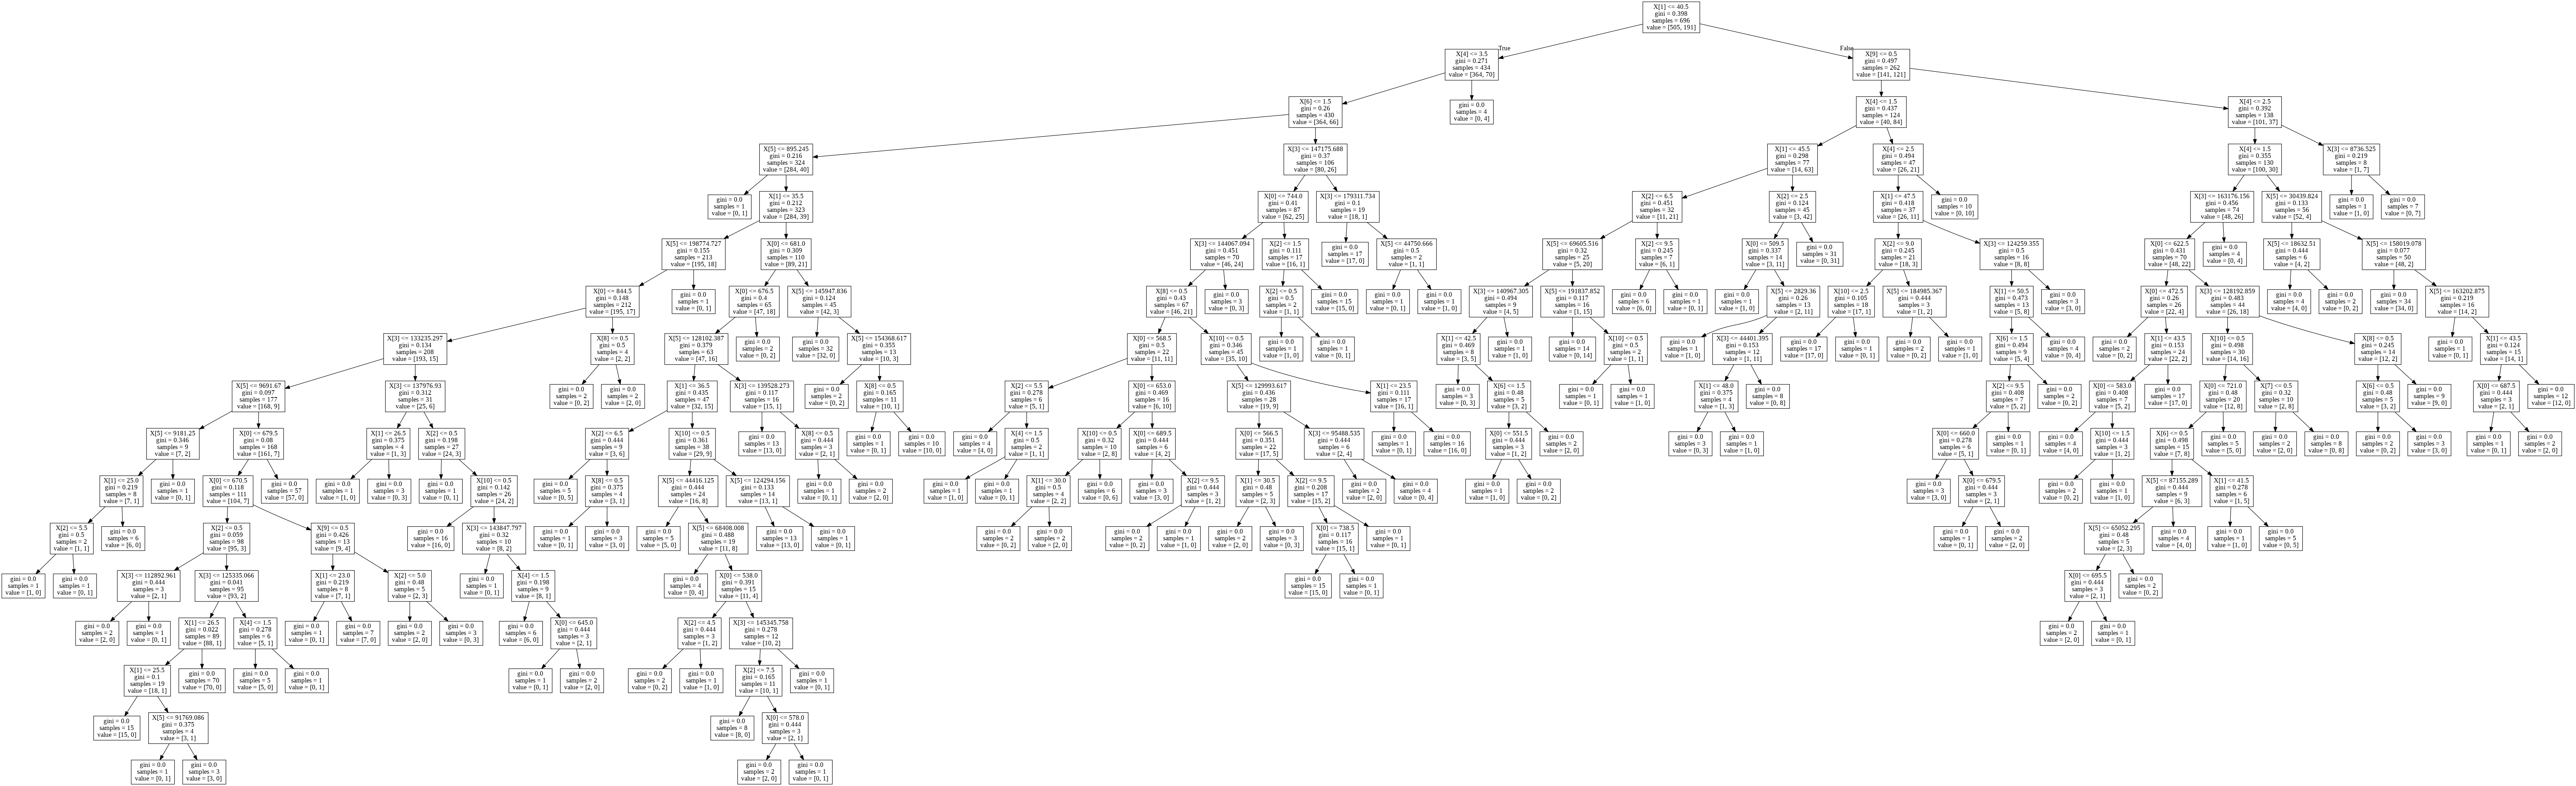

In [49]:
#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

out = StringIO()
tree.export_graphviz(classifier, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

II ] Of Quantative Explanatory Variables

In [50]:
#variables
predictors = sub1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
targets = sub1.Exited

#dividing into test and training set
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)
print('pred_train.shape')
print(pred_train.shape)
print('\npred_test.shape')
print(pred_test.shape)
print('\ntar_train.shape')
print(tar_train.shape)
print('\ntar_test.shape')
print(tar_test.shape)

pred_train.shape
(696, 6)

pred_test.shape
(299, 6)

tar_train.shape
(696,)

tar_test.shape
(299,)


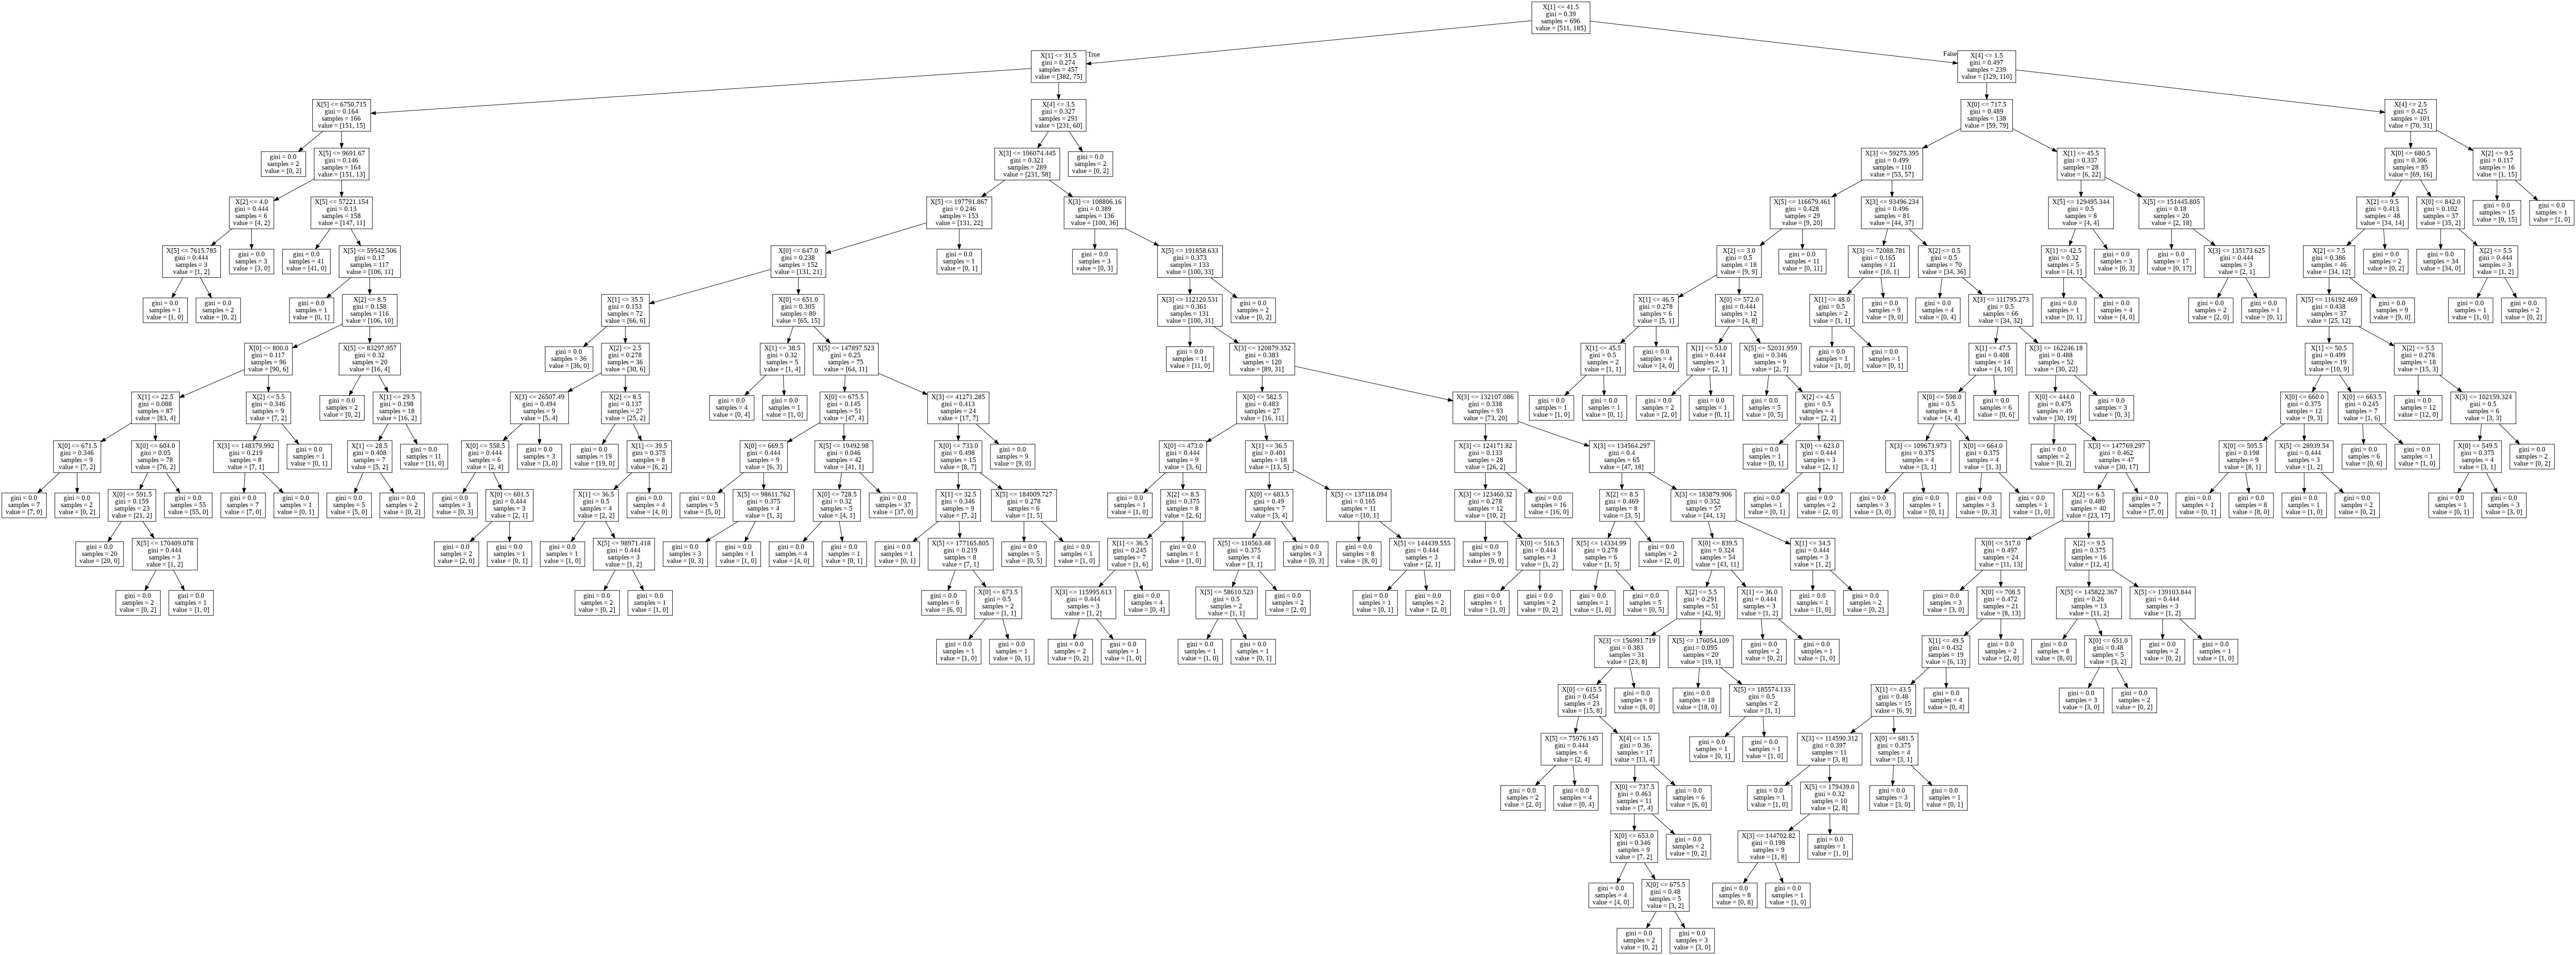

In [51]:
#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

out = StringIO()
tree.export_graphviz(classifier, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

III ] Of Categorical variables

In [52]:
#variables
predictors = sub1[['Location', 'Gender', 'HasCrCard', 'IsActiveMember', 'occupation',]]
targets =sub1.Exited

#dividing into test and training set
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)
print('pred_train.shape')
print(pred_train.shape)
print('\npred_test.shape')
print(pred_test.shape)
print('\ntar_train.shape')
print(tar_train.shape)
print('\ntar_test.shape')
print(tar_test.shape)

pred_train.shape
(696, 5)

pred_test.shape
(299, 5)

tar_train.shape
(696,)

tar_test.shape
(299,)


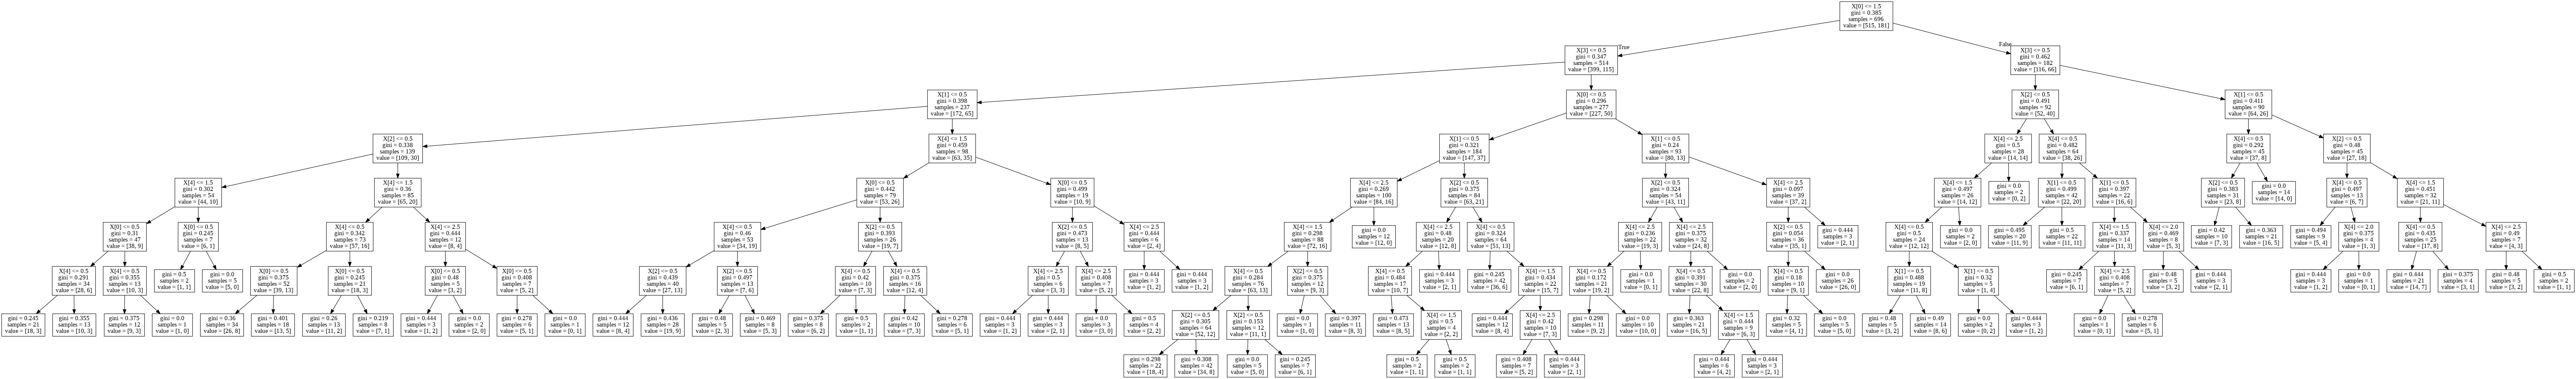

In [53]:
#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

out = StringIO()
tree.export_graphviz(classifier, out_file=out)
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

# STEP 7 : Random Forest

In [54]:
#variables
predictors = sub1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Location', 'Gender', 'HasCrCard', 'IsActiveMember', 'occupation',]]
targets = sub1.Exited

#dividing into test and training set
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)
print('pred_train.shape')
print(pred_train.shape)
print('\npred_test.shape')
print(pred_test.shape)
print('\ntar_train.shape')
print(tar_train.shape)
print('\ntar_test.shape')
print(tar_test.shape)

pred_train.shape
(696, 11)

pred_test.shape
(299, 11)

tar_train.shape
(696,)

tar_test.shape
(299,)


In [55]:
#Build model on training data
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[206,  15],
       [ 43,  35]])

In [56]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8060200668896321

In [57]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.11065933 0.20035    0.10951085 0.11270656 0.11110048 0.11734775
 0.05378992 0.03771061 0.04048367 0.04742039 0.05892045]


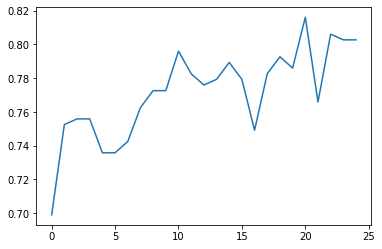

In [58]:
"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=numpy.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)

# STEP 8: Lasso Regression

In [59]:
#variables
predv = sub1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Location', 'Gender', 'HasCrCard', 'IsActiveMember', 'occupation',]]
targets = sub1.Exited

#standardize predictors to have mean=0 and std=1
predictors=predv.copy()
predictors['CreditScore']=preprocessing.scale(predictors['CreditScore'].astype('float64'))
predictors['Age']=preprocessing.scale(predictors['Age'].astype('float64'))
predictors['Tenure']=preprocessing.scale(predictors['Tenure'].astype('float64'))
predictors['Balance']=preprocessing.scale(predictors['Balance'].astype('float64'))
predictors['NumOfProducts']=preprocessing.scale(predictors['NumOfProducts'].astype('float64'))
predictors['EstimatedSalary']=preprocessing.scale(predictors['EstimatedSalary'].astype('float64'))
predictors['Location']=preprocessing.scale(predictors['Location'].astype('float64'))
predictors['Gender']=preprocessing.scale(predictors['Gender'].astype('float64'))
predictors['HasCrCard']=preprocessing.scale(predictors['HasCrCard'].astype('float64'))
predictors['IsActiveMember']=preprocessing.scale(predictors['IsActiveMember'].astype('float64'))
predictors['occupation']=preprocessing.scale(predictors['occupation'].astype('float64'))

#split data into train and test sets
pred_train, pred_test, tar_train, tar_test  =  train_test_split(predictors, targets, test_size=.3, random_state=123)
#lasso reg model
model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

#variable names and regression co-eff
dict(zip(predictors.columns, model.coef_))

{'Age': 0.12217231986859009,
 'Balance': 0.024924281900985147,
 'CreditScore': 0.0,
 'EstimatedSalary': 0.0,
 'Gender': 0.03131954355088355,
 'HasCrCard': 0.0,
 'IsActiveMember': -0.05345419873788183,
 'Location': 0.008668025481538185,
 'NumOfProducts': -0.009489610119554077,
 'Tenure': -0.011728148591174641,
 'occupation': -0.001538404861312638}

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

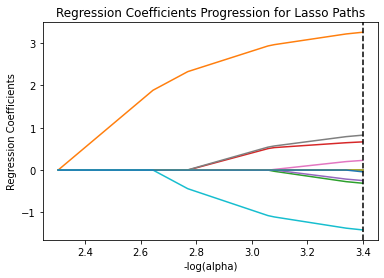

In [60]:
# plot coefficient progression
m_log_alphas = -numpy.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 1.0, 'Mean squared error on each fold')

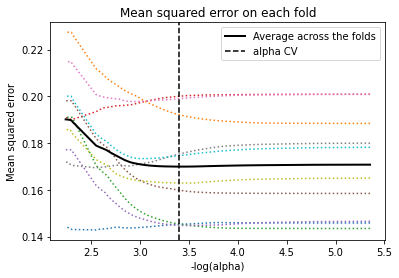

In [61]:
# plot mean square error for each fold
m_log_alphascv = -numpy.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-numpy.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [62]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.1642148011541762
test data MSE
0.16887502175857919


In [63]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.13405530936392873
test data R-square
0.15153445991689676


# STEP 9: k-means Cluster Analysis

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

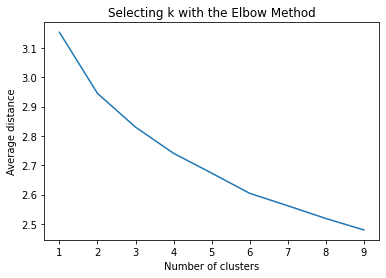

In [64]:
cluster = sub1[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Location', 'Gender', 'HasCrCard', 'IsActiveMember', 'occupation',]]

#standardize cluster to have mean=0 and std=1
cluster_v = cluster.copy()
cluster_v['CreditScore']=preprocessing.scale(cluster_v['CreditScore'].astype('float64'))
cluster_v['Age']=preprocessing.scale(cluster_v['Age'].astype('float64'))
cluster_v['Tenure']=preprocessing.scale(cluster_v['Tenure'].astype('float64'))
cluster_v['Balance']=preprocessing.scale(cluster_v['Balance'].astype('float64'))
cluster_v['NumOfProducts']=preprocessing.scale(cluster_v['NumOfProducts'].astype('float64'))
cluster_v['EstimatedSalary']=preprocessing.scale(cluster_v['EstimatedSalary'].astype('float64'))
cluster_v['Location']=preprocessing.scale(cluster_v['Location'].astype('float64'))
cluster_v['Gender']=preprocessing.scale(cluster_v['Gender'].astype('float64'))
cluster_v['HasCrCard']=preprocessing.scale(cluster_v['HasCrCard'].astype('float64'))
cluster_v['occupation']=preprocessing.scale(cluster_v['occupation'].astype('float64'))

# split data into train and test sets
clus_train, clus_test = train_test_split(cluster_v, test_size=.3, random_state=123)

# k-means cluster analysis for 10 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(numpy.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

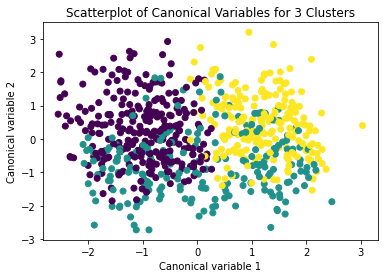

In [65]:
# Interpret 3 clusters
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

# plot clusters
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()